In [618]:
# This code demonstrates processing of a dataset that contains several biomarkers for patients over multiple checkups.
# The dataset is labeled according to whether each patient ended up developing diabetes (diabetes column).
# No patient data is shown here, nor is any of the modeling.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [619]:
# Load data into a pandas dataframe.
db = pd.read_csv("Diabetes10K.csv")

In [620]:
# Look for and remove duplicates.
db.duplicated().sum()
db.drop_duplicates(inplace=True)

In [621]:
# List the variable names
colNum = list(range(len(db.columns)))
list(zip(db.columns, colNum))


[('Age_at_Exam', 0),
 ('sBP', 1),
 ('sBP_Date', 2),
 ('BMI', 3),
 ('BMI_Date', 4),
 ('LDL', 5),
 ('LDL_Date', 6),
 ('HDL', 7),
 ('HDL_Date', 8),
 ('A1c', 9),
 ('A1c_Date', 10),
 ('TG', 11),
 ('TG_Date', 12),
 ('FBS', 13),
 ('FBS_Date', 14),
 ('FBS>DM', 15),
 ('Total_Cholesterol', 16),
 ('Total_Cholesterol_Lab_Date', 17),
 ('Diabetes', 18),
 ('DM_OnsetDate', 19),
 ('Depression', 20),
 ('Depression_OnsetDate', 21),
 ('HTN', 22),
 ('HTN_OnsetDate', 23),
 ('OA', 24),
 ('OA_OnsetDate', 25),
 ('COPD', 26),
 ('COPD_Date', 27),
 ('Hypertension_Medications', 28),
 ('Hypertension_Medications_First_Instance', 29),
 ('Corticosteroids', 30),
 ('Corticosteroids_first_instance', 31),
 ('Sex', 32),
 ('leastO(A1c_Date)', 33),
 ('leastO(DM_OnsetDate)', 34),
 ('leastO(FBS_Date)', 35),
 ('LeastOfAll', 36),
 ('A1C_BEF_DM', 37),
 ('FBS_BEF_DM', 38),
 ('Patient_ID', 39),
 ('DM_Onset_Revised', 40),
 ('DM_Onset_Revised_1YrPrior', 41),
 ('DIABETES', 42)]

In [622]:
# Remove unwanted variables (we're removing total cholesterol, since that turned out to be highly correlated with LDL in this dataset, and has more missing data than LDL)
db.drop(db.columns[[16,17,33,34,35,36, 42]], axis=1, inplace=True)
db.shape
# Cast the binary variables as integers.
db['Diabetes'] = db['Diabetes'].astype(int)
db['Depression'] = db['Depression'].astype(int)
db['HTN'] = db['HTN'].astype(int)
db['OA'] = db['OA'].astype(int)
db['COPD'] = db['COPD'].astype(int)

In [623]:
# Display the remaining variables
colNum = list(range(len(db.columns)))
list(zip(db.columns, colNum))

[('Age_at_Exam', 0),
 ('sBP', 1),
 ('sBP_Date', 2),
 ('BMI', 3),
 ('BMI_Date', 4),
 ('LDL', 5),
 ('LDL_Date', 6),
 ('HDL', 7),
 ('HDL_Date', 8),
 ('A1c', 9),
 ('A1c_Date', 10),
 ('TG', 11),
 ('TG_Date', 12),
 ('FBS', 13),
 ('FBS_Date', 14),
 ('FBS>DM', 15),
 ('Diabetes', 16),
 ('DM_OnsetDate', 17),
 ('Depression', 18),
 ('Depression_OnsetDate', 19),
 ('HTN', 20),
 ('HTN_OnsetDate', 21),
 ('OA', 22),
 ('OA_OnsetDate', 23),
 ('COPD', 24),
 ('COPD_Date', 25),
 ('Hypertension_Medications', 26),
 ('Hypertension_Medications_First_Instance', 27),
 ('Corticosteroids', 28),
 ('Corticosteroids_first_instance', 29),
 ('Sex', 30),
 ('A1C_BEF_DM', 31),
 ('FBS_BEF_DM', 32),
 ('Patient_ID', 33),
 ('DM_Onset_Revised', 34),
 ('DM_Onset_Revised_1YrPrior', 35)]

In [624]:
# Summarize missing data.
db.isna().sum()

Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL                                          61
LDL_Date                                      0
HDL                                          72
HDL_Date                                     64
A1c                                           0
A1c_Date                                      0
TG                                           53
TG_Date                                      42
FBS                                           0
FBS_Date                                      0
FBS>DM                                        0
Diabetes                                      0
DM_OnsetDate                               4857
Depression                                    0
Depression_OnsetDate                       7869
HTN                                     

In [625]:
# We'll only drop data that has missing values in blood pressure, cholesterol, and triglycerides
db.dropna(subset=['sBP', 'LDL', 'HDL', 'HDL_Date', 'TG', 'TG_Date'], inplace=True)
db.shape

(9812, 36)

In [626]:
# Let's examine the correlations between some of the variables.
db[['sBP', 'LDL', 'HDL', 'A1c', 'TG', 'FBS']].corr()
# With the exception of fasting blood sugar and glycated hemoglobin, these look highly independent.

,sBP,LDL,HDL,A1c,TG,FBS
sBP,1.000000,0.023931,-0.012852,0.077959,0.074787,0.096516
LDL,0.023931,1.000000,0.169547,-0.202166,0.034696,-0.177822
HDL,-0.012852,0.169547,1.000000,-0.240641,-0.346297,-0.252894
A1c,0.077959,-0.202166,-0.240641,1.000000,0.205038,0.770089
TG,0.074787,0.034696,-0.346297,0.205038,1.000000,0.256349
FBS,0.096516,-0.177822,-0.252894,0.770089,0.256349,1.000000


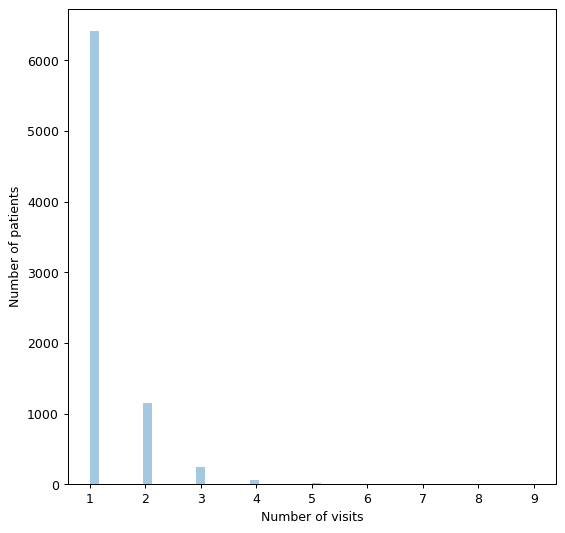

In [627]:
# Let's see how many measurements we have for each patient.
numMeasurements = db.groupby('Patient_ID')['sBP'].count()
fig, ax = plt.subplots(1, 1, figsize = (7, 7), dpi=90)
sb.distplot(numMeasurements, kde = False)
ax.set_ylabel('Number of patients');    
ax.set_xlabel('Number of visits');
# Clearly, there isn't much longitudinal data (the vast majority of patients have under 3 records).
# So, instead of worrying about temporal features, we will just average the data for each patient.
# This also means we can ignore date data for this particular analysis.

In [628]:
# Code Sex as a binary variable
db['Sex_Male'] = db.Sex.map({'Female':0, 'Male':1})
db.drop(['Sex'], axis=1, inplace=True)

In [629]:
# Replace missing values with "No_MEDICATION" for medications.
db['Corticosteroids'].fillna('NO_MEDICATION', inplace=True)
db['Hypertension_Medications'].fillna('NO_MEDICATION', inplace=True)

In [630]:
# This is what the Corticosteroids column looks like. We need to encode this information in a more usable way.
db['Corticosteroids'].sample(30)

4709     HYDROCORTISONE AND ANTIINFECTIVES / HYDROCORT...
9934                                        NO_MEDICATION
1125                                        NO_MEDICATION
9172                                        NO_MEDICATION
8396                                        NO_MEDICATION
1482                       HYDROCORTISONE AND ANTIBIOTICS
3783                                        NO_MEDICATION
3401                                        NO_MEDICATION
4019                     DEXAMETHASONE AND ANTIINFECTIVES
6144                                           PREDNISONE
9338                                        NO_MEDICATION
1653                                        NO_MEDICATION
3141                                        NO_MEDICATION
5601                                        NO_MEDICATION
758                                         NO_MEDICATION
9144                                        NO_MEDICATION
2037                                        NO_MEDICATION
9658     HYDRO

In [631]:
# Create a function that will take in a series or list object, and parse it for unique strings.
# Strings are separated by a separator list, which is the second argument for the function.
def ParseString(series, separators):
    joined = ','.join(series)
    for i in separators:
        joined = joined.replace(i, ',')
    joined = joined.split(',')
    joined = [x.strip() for x in joined]
    joined = set(joined)    
    return joined

In [632]:
# Use parsing function to extract unique corticosteroid medications.
corticoMeds = ParseString(db['Corticosteroids'], ['/', ' AND '])
# Show the list of unique corticosteroid meds.
corticoMeds

{'ANTIBIOTICS',
 'ANTIINFECTIVES',
 'COMBINATIONS',
 'CORTISONE',
 'DEXAMETHASONE',
 'HYDROCORTISONE',
 'METHYLPREDNISOLONE',
 'NO_MEDICATION',
 'PREDNISOLONE',
 'PREDNISONE'}

In [633]:
# Create new variables to encode medication data.
# First, corticosteroids.
for i in corticoMeds:
    db['Cortico'+i] = 0
db.reset_index(inplace=True, drop = True)
# Now, populate these variables depending on which medications belong to each entry (see if this can be improved to linear time)
for i in range(0, len(db)):
    for j in corticoMeds:
        if j in db.loc[i, 'Corticosteroids']:
            db.loc[i, 'Cortico'+j] = 1

In [634]:
# Here's what some of the new variables look like.
columns = ['Corticosteroids', 'CorticoHYDROCORTISONE', 'CorticoNO_MEDICATION', 'CorticoANTIBIOTICS', 'CorticoMETHYLPREDNISOLONE'] 
db[columns].sample(15)

,Corticosteroids,CorticoHYDROCORTISONE,CorticoNO_MEDICATION,CorticoANTIBIOTICS,CorticoMETHYLPREDNISOLONE
4670,NO_MEDICATION,0,1,0,0
7097,NO_MEDICATION,0,1,0,0
3055,NO_MEDICATION,0,1,0,0
652,NO_MEDICATION,0,1,0,0
2679,NO_MEDICATION,0,1,0,0
5256,METHYLPREDNISOLONE,0,0,0,1
7198,NO_MEDICATION,0,1,0,0
9690,NO_MEDICATION,0,1,0,0
7579,NO_MEDICATION,0,1,0,0
387,NO_MEDICATION,0,1,0,0


In [635]:
# Since there are a lot of hypertension meds (not shown here), let's just use a binary variable for now, and call it UsingHyperMed.
db.loc[db['Hypertension_Medications'] == 'No_Medication', 'UsingHyperMed'] = 0
db.loc[db['Hypertension_Medications'] != 'No_Medication', 'UsingHyperMed'] = 1
db['UsingHyperMed'] = db['UsingHyperMed'].astype(int)

In [636]:
# Next, do a check to ensure that all records have at least one "1" value among the new 'CorticoMedication' columns (sanity check).
colNum = list(range(len(db.columns)))
list(zip(db.columns, colNum))

[('Age_at_Exam', 0),
 ('sBP', 1),
 ('sBP_Date', 2),
 ('BMI', 3),
 ('BMI_Date', 4),
 ('LDL', 5),
 ('LDL_Date', 6),
 ('HDL', 7),
 ('HDL_Date', 8),
 ('A1c', 9),
 ('A1c_Date', 10),
 ('TG', 11),
 ('TG_Date', 12),
 ('FBS', 13),
 ('FBS_Date', 14),
 ('FBS>DM', 15),
 ('Diabetes', 16),
 ('DM_OnsetDate', 17),
 ('Depression', 18),
 ('Depression_OnsetDate', 19),
 ('HTN', 20),
 ('HTN_OnsetDate', 21),
 ('OA', 22),
 ('OA_OnsetDate', 23),
 ('COPD', 24),
 ('COPD_Date', 25),
 ('Hypertension_Medications', 26),
 ('Hypertension_Medications_First_Instance', 27),
 ('Corticosteroids', 28),
 ('Corticosteroids_first_instance', 29),
 ('A1C_BEF_DM', 30),
 ('FBS_BEF_DM', 31),
 ('Patient_ID', 32),
 ('DM_Onset_Revised', 33),
 ('DM_Onset_Revised_1YrPrior', 34),
 ('Sex_Male', 35),
 ('CorticoDEXAMETHASONE', 36),
 ('CorticoMETHYLPREDNISOLONE', 37),
 ('CorticoANTIINFECTIVES', 38),
 ('CorticoHYDROCORTISONE', 39),
 ('CorticoPREDNISONE', 40),
 ('CorticoCOMBINATIONS', 41),
 ('CorticoANTIBIOTICS', 42),
 ('CorticoPREDNISOLONE',

In [637]:
def CheckOnes(series):
    if 1 in series:
        return True
    else:
        return False
# Apply the CheckOnes function to each row of the new medication columns.    
test = db.iloc[:,37:47].apply(CheckOnes, raw = True, axis = 1)
# If there is even a single entry that doesn't have at least a single "1" among the new medication columns, then the test array will contain a False value.
# Let's check!
sum(test[test==False])
# Good, no False values!

0

In [638]:
# Next, make sure that sex is consistent within each patient across all records for that patient.
# This is a good sanity check, and also important when we group the data by patient id.
db.reset_index(inplace=True, drop = True)
# Create a series object whose index is the patient ID, and whose value is "True" if the Sex_Male column was the same value for all records involving that patient.
sexConsistency = db.groupby(['Patient_ID'])['Sex_Male'].nunique()==1
len(sexConsistency[sexConsistency==False])
# 287 patients that have inconsistent sex. Let's remove these patients.

287

In [639]:
inconsistentSex = sexConsistency[sexConsistency==False]
boolMask = db['Patient_ID'].isin(inconsistentSex.index)
indicesToRemove = db.index[boolMask]
len(indicesToRemove)
# We will be removing 707 records (707 records across 287 patients).

707

In [640]:
# Remove them!
db.drop(indicesToRemove, inplace=True)
db.reset_index(inplace=True, drop = True)

In [641]:
# Turn the above procedure into a function that automatically removes patients with inconsistent records for any desired variable.
# In addition to removing these records, it will return a value indicating how many records were deleted.
def RemoveInconsistencies(df, groupingVar, consistencyVar):
    varConsistency = df.groupby([groupingVar])[consistencyVar].nunique()==1
    inconsistents = varConsistency[varConsistency==False]
    boolMask = df[groupingVar].isin(inconsistents.index)
    indicesToRemove = df.index[boolMask]
    df.drop(indicesToRemove, inplace=True)
    db.reset_index(inplace=True, drop = True)
    return (len(indicesToRemove))

In [642]:
# let's remove patients who have inconsistent records in the Diabetes column.
RemoveInconsistencies(db, 'Patient_ID', 'Diabetes') 

286

In [643]:
colNum = list(range(len(db.columns)))
list(zip(db.columns, colNum))

[('Age_at_Exam', 0),
 ('sBP', 1),
 ('sBP_Date', 2),
 ('BMI', 3),
 ('BMI_Date', 4),
 ('LDL', 5),
 ('LDL_Date', 6),
 ('HDL', 7),
 ('HDL_Date', 8),
 ('A1c', 9),
 ('A1c_Date', 10),
 ('TG', 11),
 ('TG_Date', 12),
 ('FBS', 13),
 ('FBS_Date', 14),
 ('FBS>DM', 15),
 ('Diabetes', 16),
 ('DM_OnsetDate', 17),
 ('Depression', 18),
 ('Depression_OnsetDate', 19),
 ('HTN', 20),
 ('HTN_OnsetDate', 21),
 ('OA', 22),
 ('OA_OnsetDate', 23),
 ('COPD', 24),
 ('COPD_Date', 25),
 ('Hypertension_Medications', 26),
 ('Hypertension_Medications_First_Instance', 27),
 ('Corticosteroids', 28),
 ('Corticosteroids_first_instance', 29),
 ('A1C_BEF_DM', 30),
 ('FBS_BEF_DM', 31),
 ('Patient_ID', 32),
 ('DM_Onset_Revised', 33),
 ('DM_Onset_Revised_1YrPrior', 34),
 ('Sex_Male', 35),
 ('CorticoDEXAMETHASONE', 36),
 ('CorticoMETHYLPREDNISOLONE', 37),
 ('CorticoANTIINFECTIVES', 38),
 ('CorticoHYDROCORTISONE', 39),
 ('CorticoPREDNISONE', 40),
 ('CorticoCOMBINATIONS', 41),
 ('CorticoANTIBIOTICS', 42),
 ('CorticoPREDNISOLONE',

In [644]:
# Now do the same for medications (this will effectively filter out patients who changed cortico or hyper medications at some point)
for i in db.columns[36:47]:
    RemoveInconsistencies(db, 'Patient_ID', i)

In [645]:
# Check how many records are remaining
len(db)

8683

In [646]:
# Check class balance
sum(db['Diabetes']) / len(db)
# Good, still balanced!

0.5130715190602326

In [647]:
# Remove variables we're not interested in.
colNum = list(range(len(db.columns)))
list(zip(db.columns, colNum))

[('Age_at_Exam', 0),
 ('sBP', 1),
 ('sBP_Date', 2),
 ('BMI', 3),
 ('BMI_Date', 4),
 ('LDL', 5),
 ('LDL_Date', 6),
 ('HDL', 7),
 ('HDL_Date', 8),
 ('A1c', 9),
 ('A1c_Date', 10),
 ('TG', 11),
 ('TG_Date', 12),
 ('FBS', 13),
 ('FBS_Date', 14),
 ('FBS>DM', 15),
 ('Diabetes', 16),
 ('DM_OnsetDate', 17),
 ('Depression', 18),
 ('Depression_OnsetDate', 19),
 ('HTN', 20),
 ('HTN_OnsetDate', 21),
 ('OA', 22),
 ('OA_OnsetDate', 23),
 ('COPD', 24),
 ('COPD_Date', 25),
 ('Hypertension_Medications', 26),
 ('Hypertension_Medications_First_Instance', 27),
 ('Corticosteroids', 28),
 ('Corticosteroids_first_instance', 29),
 ('A1C_BEF_DM', 30),
 ('FBS_BEF_DM', 31),
 ('Patient_ID', 32),
 ('DM_Onset_Revised', 33),
 ('DM_Onset_Revised_1YrPrior', 34),
 ('Sex_Male', 35),
 ('CorticoDEXAMETHASONE', 36),
 ('CorticoMETHYLPREDNISOLONE', 37),
 ('CorticoANTIINFECTIVES', 38),
 ('CorticoHYDROCORTISONE', 39),
 ('CorticoPREDNISONE', 40),
 ('CorticoCOMBINATIONS', 41),
 ('CorticoANTIBIOTICS', 42),
 ('CorticoPREDNISOLONE',

In [648]:
db.drop(db.columns[[2,4,6,8,10,12,14,15,17,19,21,23,25,26,27,28,29,30,31,33,34]], axis=1, inplace=True)

In [649]:
# Display remaining columns.
colNum = list(range(len(db.columns)))
list(zip(db.columns, colNum))

[('Age_at_Exam', 0),
 ('sBP', 1),
 ('BMI', 2),
 ('LDL', 3),
 ('HDL', 4),
 ('A1c', 5),
 ('TG', 6),
 ('FBS', 7),
 ('Diabetes', 8),
 ('Depression', 9),
 ('HTN', 10),
 ('OA', 11),
 ('COPD', 12),
 ('Patient_ID', 13),
 ('Sex_Male', 14),
 ('CorticoDEXAMETHASONE', 15),
 ('CorticoMETHYLPREDNISOLONE', 16),
 ('CorticoANTIINFECTIVES', 17),
 ('CorticoHYDROCORTISONE', 18),
 ('CorticoPREDNISONE', 19),
 ('CorticoCOMBINATIONS', 20),
 ('CorticoANTIBIOTICS', 21),
 ('CorticoPREDNISOLONE', 22),
 ('CorticoNO_MEDICATION', 23),
 ('CorticoCORTISONE', 24),
 ('UsingHyperMed', 25)]

In [650]:
# Now let's prepare to group the data by patient ID.
# For depression, hypertension, osteoarthristis, and COPD, let's assign each patient a value of 1 if they were diagnosed at any checkup.
# For the other variables, we'll use the mean of the values across checkups.
groupingFunctions = {}
keys = db.columns
for i in keys:
    if i == 'Patient_ID':
        continue
    if i in ['Depression', 'HTN', 'OA', 'COPD']:
        groupingFunctions[i] = 'max'
    else:
        groupingFunctions[i] = 'mean'

In [651]:
# Group the data using these functions.
dbGrouped = db.groupby('Patient_ID').agg(groupingFunctions)
dbGrouped.head(0)

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,Diabetes,Depression,...,CorticoMETHYLPREDNISOLONE,CorticoANTIINFECTIVES,CorticoHYDROCORTISONE,CorticoPREDNISONE,CorticoCOMBINATIONS,CorticoANTIBIOTICS,CorticoPREDNISOLONE,CorticoNO_MEDICATION,CorticoCORTISONE,UsingHyperMed
Patient_ID,,,,,,,,,,,,,,,,,,,,,
